# Project name : Sales Forecasting For Furniture Store


# Submitted by : Yashodharani Arava

## Problem statement

For a retail furniture store, predicting future sales is critical to avoiding inventory issues like overstocking
or under-stocking. The challenge lies in utilizing time series data from the superstore dataset to forecast
furniture sales for the next year accurately. This predictive insight ensures an optimal customer
experience, avoids losses, and maintains store sustainability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm

plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14  # Using plt.rcParams to set parameters
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'


In [2]:
data = pd.read_csv('Super_Store_data.csv', encoding = 'cp1252')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [5]:
data.shape

(2121, 21)

In [6]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [7]:
data.describe(include =['O'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
unique,1764,889,960,4,707,707,3,1,371,48,4,375,1,4,380
top,US-2015-129007,9/5/2016,12/6/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table
freq,4,10,10,1248,15,15,1113,2121,192,444,707,16,2121,957,18


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [9]:
#Check the time spam
data['Order Date'].min(), data['Order Date'].max()

('1/1/2017', '9/9/2017')

In [10]:
columns=['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
data.drop(columns, axis = 1, inplace = True)

data = data.sort_values('Order Date')

#checking null values
data.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
data.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [12]:
data = data.groupby("Order Date")['Sales'].sum().reset_index()


In [13]:
data.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


In [14]:
#using the pd to_datetime we convert the order of date format so that python treat date as date not object
data["Order Date"] = pd.to_datetime(data["Order Date"])
data.set_index("Order Date", inplace = True)
data.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [15]:
data.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [17]:
y = data["Sales"].resample('MS').mean() #MS mean Month Start


In [18]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

# EDA

## Visually checking the time series for trend and other components

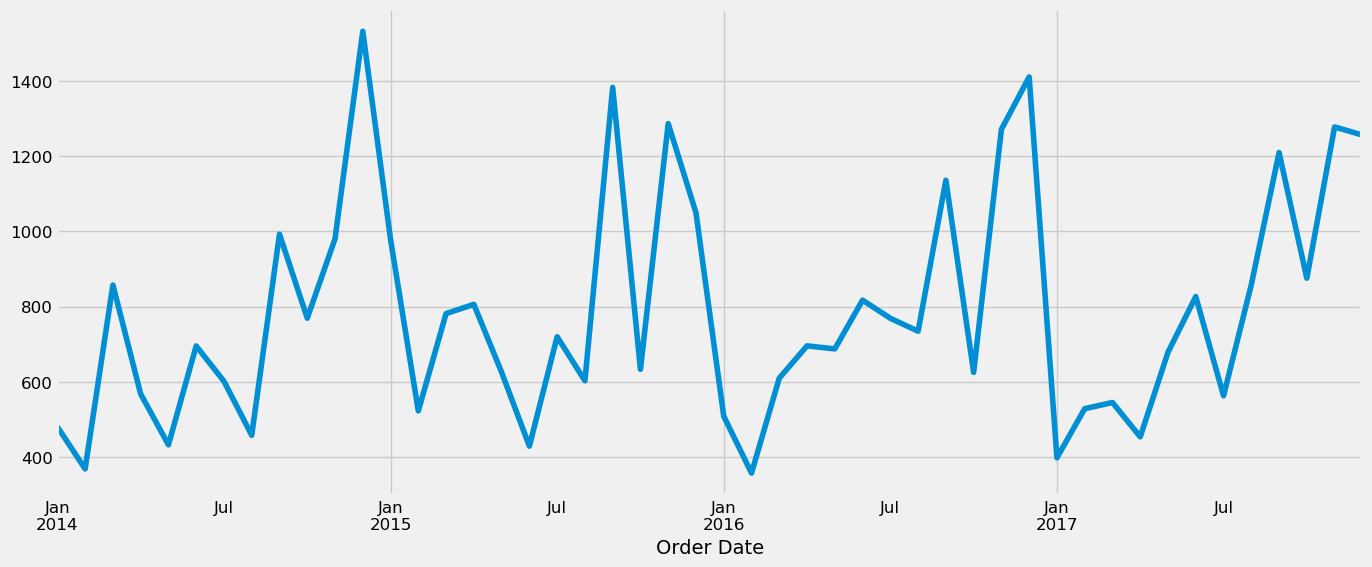

In [19]:
y.plot(figsize=(15,6))
plt.show()

 The plot clearly indicates that the time series has seasonality pattern. The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

##### How to check if given series is stationary or not:

* One way is to check autocorrelation.
* Autocorrelation is the similarity between observations as a function of the time lag between them.
* When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series, while for non-stationary data the degradation will happen more slowly.

### Performing the Dicky Fuller Test


In [20]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print("ADF Statistic: %f" % result[0]) #%f means float 
      
print('P-value: %f' % result[1])  
      
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) #%.3f means float with 3 decimal point

ADF Statistic: -5.191070
P-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


This suggest that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low propability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggest the time series does not have a unit root, meaning it is stationary.

### Decomposing
 Decomposing the time series into three distinct components: trend, seasonality,and noise

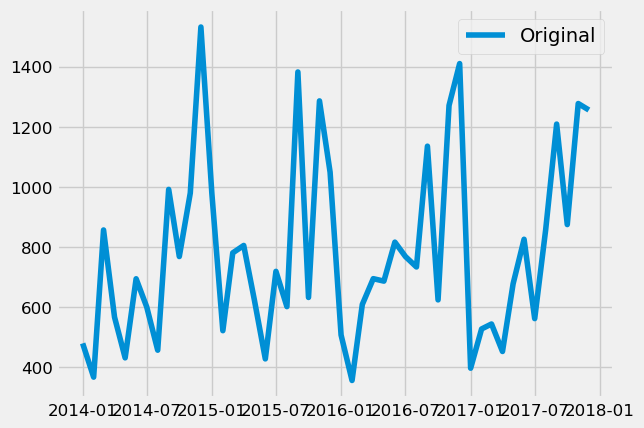

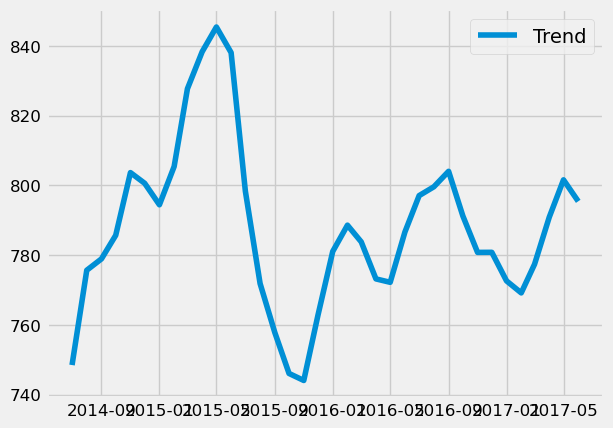

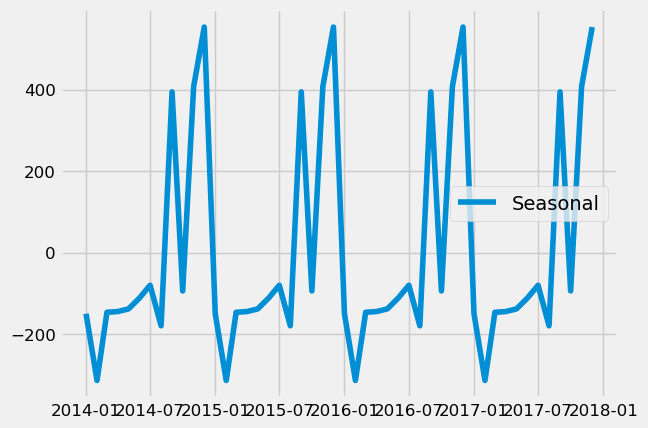

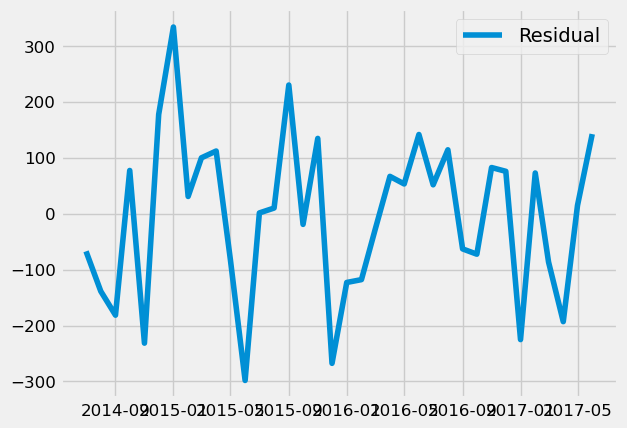

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend  = decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc  = "best")

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

By visualizing the decomposition components of the original time series we can say that the sales of furniture is unstable, along with its ARIMA(p,d,q)

#### Forecasting using the best AR I MA(p,d,q) and Seasonality's(P,D,Q)
Time Series Forecasting using ARIMA. We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q)

In [22]:


p = d = q  = range(0, 2) 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]
print('Examples of paramter combination for Seasonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paramter combination for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
from pylab import rcParams #Param means Parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility= False)
            results = mod.fit()
            print('ARIMA{}x{}12- AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:769.0817523205915


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:1512.2141782148983
ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:477.7170130920111
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:302.2702899793796
ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:497.2314433418337


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:1530.210753040608
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:304.2488280302721
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:720.9252270758101


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:2725.73160034625
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:466.5607429809164
ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:291.62613896732995


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:499.57038914483076


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:2649.9101727178627
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:319.9884876946867
ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:291.8725576428801
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:677.8947668414504


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:1391.4143434582893
ARIMA(0, 1, 0)x(0, 1, 0, 12)12- AIC:486.6378567211039
ARIMA(0, 1, 0)x(0, 1, 1, 12)12- AIC:304.9671228167959
ARIMA(0, 1, 0)x(1, 0, 0, 12)12- AIC:497.7889663004408


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12- AIC:1341.6322021362023
ARIMA(0, 1, 0)x(1, 1, 0, 12)12- AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12- AIC:306.9113200151459
ARIMA(0, 1, 1)x(0, 0, 0, 12)12- AIC:649.9056176817257


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12- AIC:1011.1072911137464
ARIMA(0, 1, 1)x(0, 1, 0, 12)12- AIC:458.8705548482728
ARIMA(0, 1, 1)x(0, 1, 1, 12)12- AIC:279.58062333809045
ARIMA(0, 1, 1)x(1, 0, 0, 12)12- AIC:486.18329774425575


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12- AIC:2522.804132839827
ARIMA(0, 1, 1)x(1, 1, 0, 12)12- AIC:310.75743684173074
ARIMA(0, 1, 1)x(1, 1, 1, 12)12- AIC:281.55766214612527
ARIMA(1, 0, 0)x(0, 0, 0, 12)12- AIC:692.1645522067713


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12- AIC:1336.0200811914551
ARIMA(1, 0, 0)x(0, 1, 0, 12)12- AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12- AIC:304.20776751609816
ARIMA(1, 0, 0)x(1, 0, 0, 12)12- AIC:480.9259367935205


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12- AIC:1646.584047869031
ARIMA(1, 0, 0)x(1, 1, 0, 12)12- AIC:304.4664675084559
ARIMA(1, 0, 0)x(1, 1, 1, 12)12- AIC:304.5842692143838
ARIMA(1, 0, 1)x(0, 0, 0, 12)12- AIC:665.77944421856


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12- AIC:2662.745462811701
ARIMA(1, 0, 1)x(0, 1, 0, 12)12- AIC:468.368519581399
ARIMA(1, 0, 1)x(0, 1, 1, 12)12- AIC:293.34221939659227
ARIMA(1, 0, 1)x(1, 0, 0, 12)12- AIC:482.5763323877195


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12- AIC:2556.2512641349717
ARIMA(1, 0, 1)x(1, 1, 0, 12)12- AIC:306.01560022474007
ARIMA(1, 0, 1)x(1, 1, 1, 12)12- AIC:293.7513188124041
ARIMA(1, 1, 0)x(0, 0, 0, 12)12- AIC:671.2513547541902


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12- AIC:1373.9040760492685
ARIMA(1, 1, 0)x(0, 1, 0, 12)12- AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12)12- AIC:300.2130611619096
ARIMA(1, 1, 0)x(1, 0, 0, 12)12- AIC:475.34036587845566


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12- AIC:1527.0133964729714
ARIMA(1, 1, 0)x(1, 1, 0, 12)12- AIC:300.62709013453804
ARIMA(1, 1, 0)x(1, 1, 1, 12)12- AIC:302.3264992508564
ARIMA(1, 1, 1)x(0, 0, 0, 12)12- AIC:649.0318019834979


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12- AIC:938.3014568195242
ARIMA(1, 1, 1)x(0, 1, 0, 12)12- AIC:460.47626876100213
ARIMA(1, 1, 1)x(0, 1, 1, 12)12- AIC:281.38730069394035
ARIMA(1, 1, 1)x(1, 0, 0, 12)12- AIC:469.5250354660813
ARIMA(1, 1, 1)x(1, 0, 1, 12)12- AIC:1861.2154614443518


C:\Users\Arava yashodharani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 0, 12)12- AIC:297.7875439545454
ARIMA(1, 1, 1)x(1, 1, 1, 12)12- AIC:283.36610170083907


In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


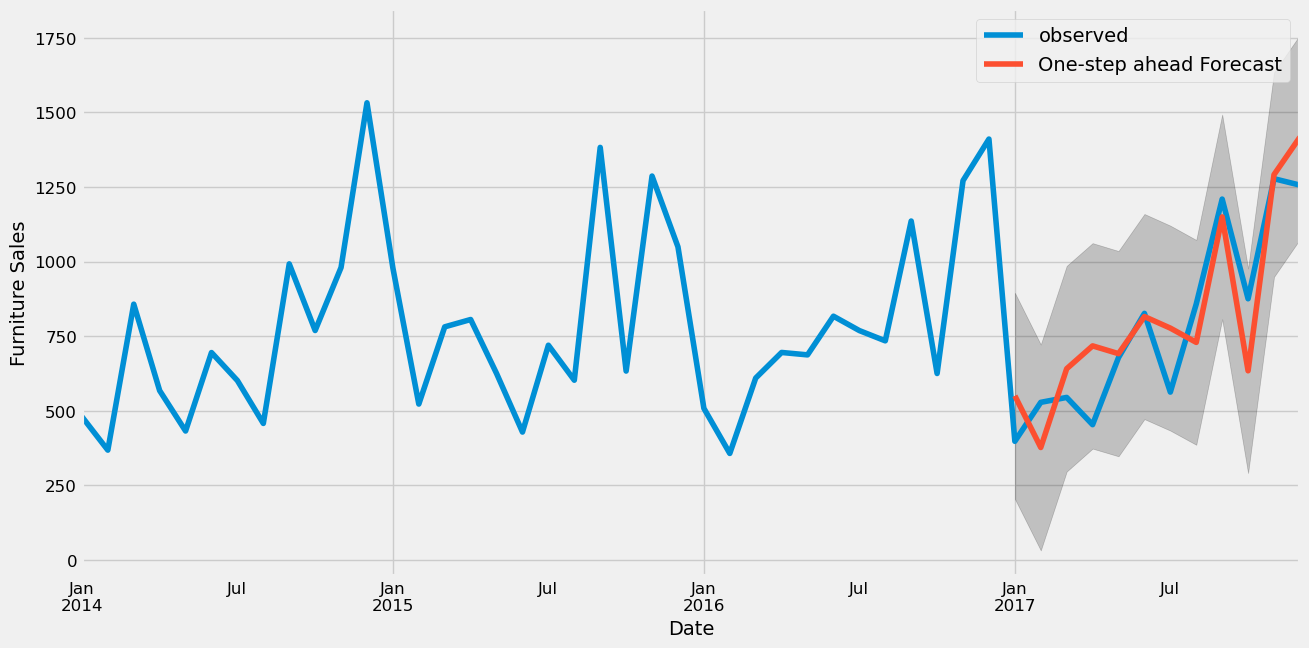

In [25]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors - that is, the average squared difference between the estimated value and what is estimated. The MSE is a measure of the quality of an estimator - it is always non - negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furnituredaily sales range from around 400 to over 1200. In my opinion, this is a pritty good model so far. Mean Absolute Percentage Error and Mean absolute Deviation we can also check instead of RMSE.

            lower Sales  upper Sales
2018-01-01    66.439614   751.053374
2018-02-01   191.940400   876.931510
2018-03-01   214.443186   899.438826
2018-04-01   127.554352   812.550057
2018-05-01   346.657607  1031.653313
2018-06-01   494.346933  1179.342639
2018-07-01   235.873431   920.869137
2018-08-01   522.882030  1207.877736
2018-09-01   875.774939  1560.770645
2018-10-01   537.150022  1222.145728
2018-11-01   945.782292  1630.777998
2018-12-01   928.336186  1613.331892
2019-01-01   -66.357378   904.538610


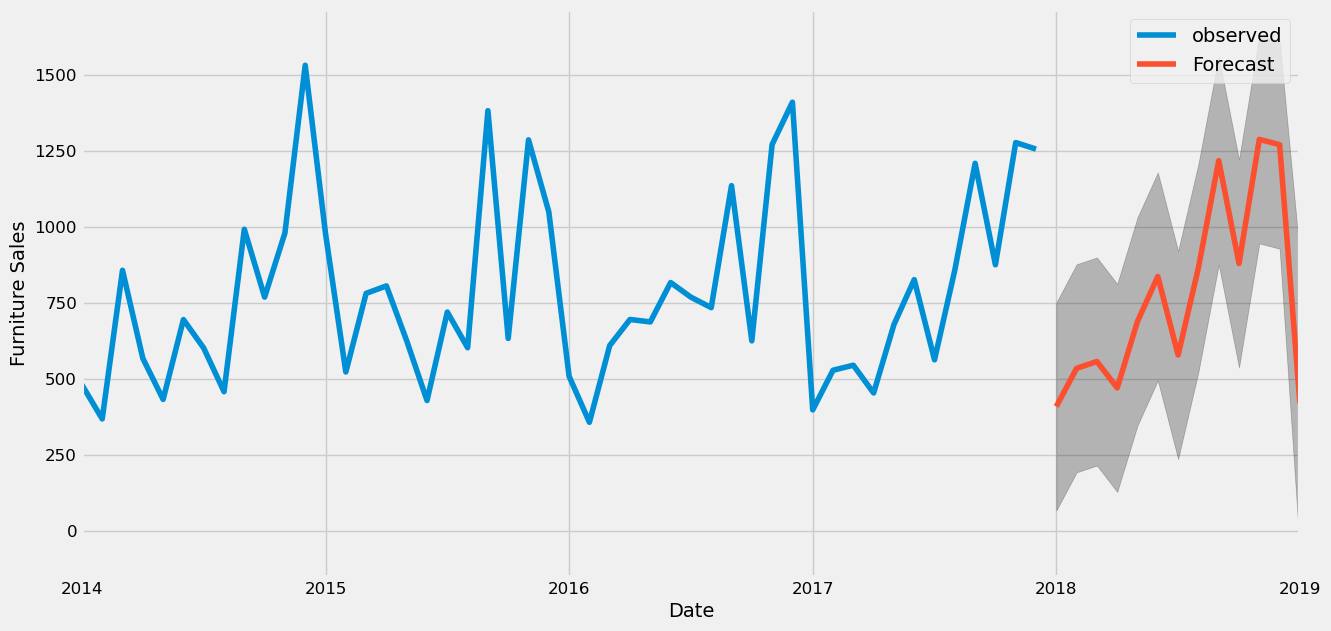

In [27]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

### Diagnostics
* Errors follows normality
* Errors should not have auto correlation (ACF, no spikes beyond the limits)
* Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

In [28]:
len(y)

48

In [29]:
# enforce_stationarity=False

mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1),
                            seasonal_order=(1, 1, 0, 12),
                            enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


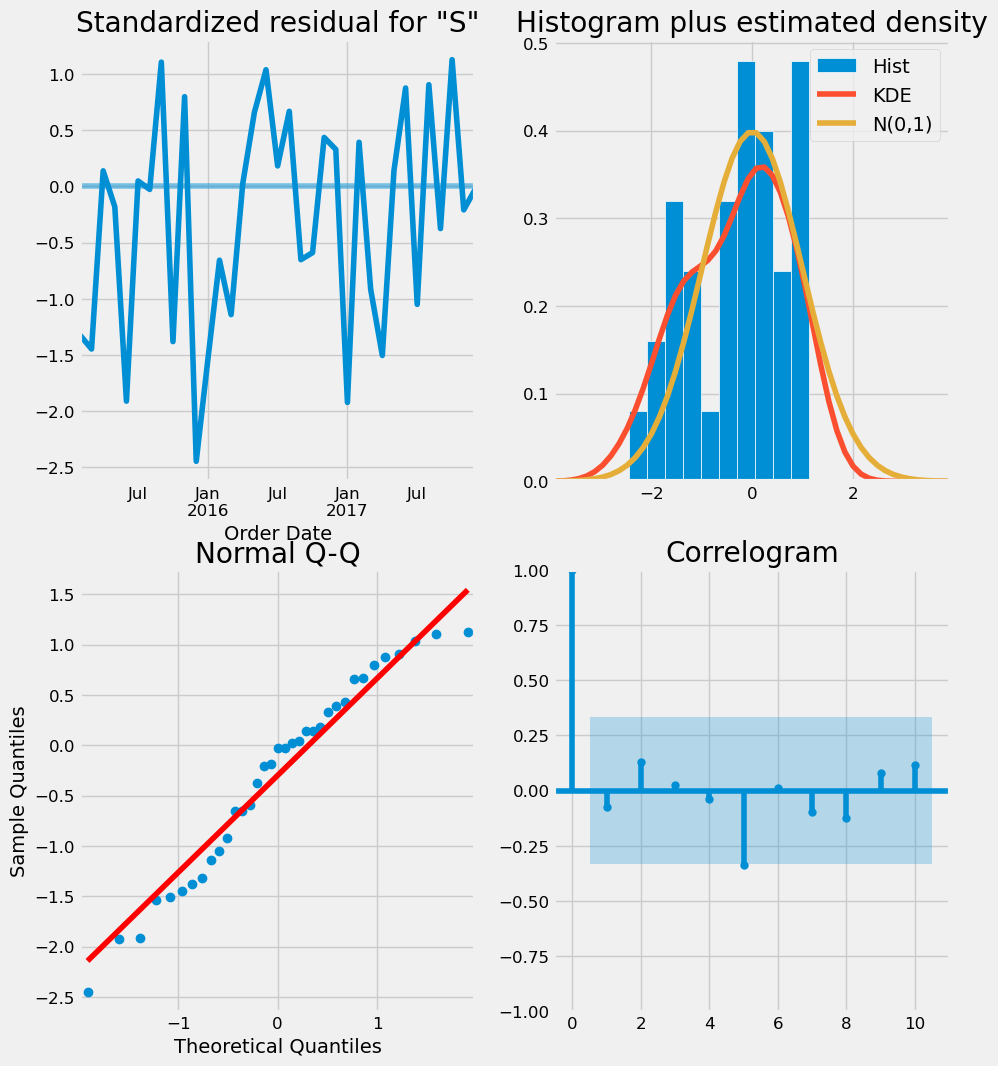

In [30]:
results.plot_diagnostics(figsize=(10,12))
plt.show()



The KDE plot of the residuals on the top right is almost similar with the normal distribution.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.